# **Task:**
---

Plot various functions that are studied in the notes on Asymptotic analysis in order to compare their asymptotic behaviour.

# **Libraries:**

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.special import gamma
from tabulate import tabulate
import time

# **Asymptotic Analysis and Function Growth Comparison:**

In asymptotic analysis, we say that a function $ f(n) $ is little-o of another function $ g(n) $, denoted as $ f(n) = o(g(n)) $, if:

$$
\lim_{{n \to \infty}} \frac{f(n)}{g(n)} = 0.
$$

This means that $ f(n) $ grows strictly slower than $ g(n) $ as $ n $ approaches infinity. To visualize this, I have compared functions in increasing order of their asymptotic growth.

The following functions are considered in increasing order of their asymptotic behavior:

1. **Constant function**: $ f(x) = 1 $
2. **Double logarithm**: $ f(x) = \log(\log(x)) $
3. **Logarithm**: $ f(x) = \log(x) $
4. **Power of logarithm**: $ f(x) = (\log(x))^c, c > 1 $
5. **Fractional power**: $ f(x) = x^c, 0 < c < 1 $
6. **Identity function**: $ f(x) = x $
7. **Power function**: $ f(x) = x^c, c > 1 $
8. **Exponential function**: $ f(x) = c^x, c > 1 $
9. **Factorial function**: $ f(x) = x! $

Each function is asymptotically smaller than the next one in the list.
If $ f(x) = o(g(x)) $, the ratio should approach **0** as $ x \to \infty $.

In the plots below, I observed that:
- Logarithmic functions grow much slower than polynomial functions.
- Polynomials are outpaced by exponentials.
- Factorial growth dominates all previous functions.
- In every case, the ratio $ \frac{f(x)}{g(x)} $ approaches **0**, confirming the little-o relationships.

And hence it confirms that each function in the given order is asymptotically smaller than the next, like:

$$
\log(\log(x)) = o(\log(x)), \quad \log(x) = o((\log(x))^c), \quad \text{etc.}
$$



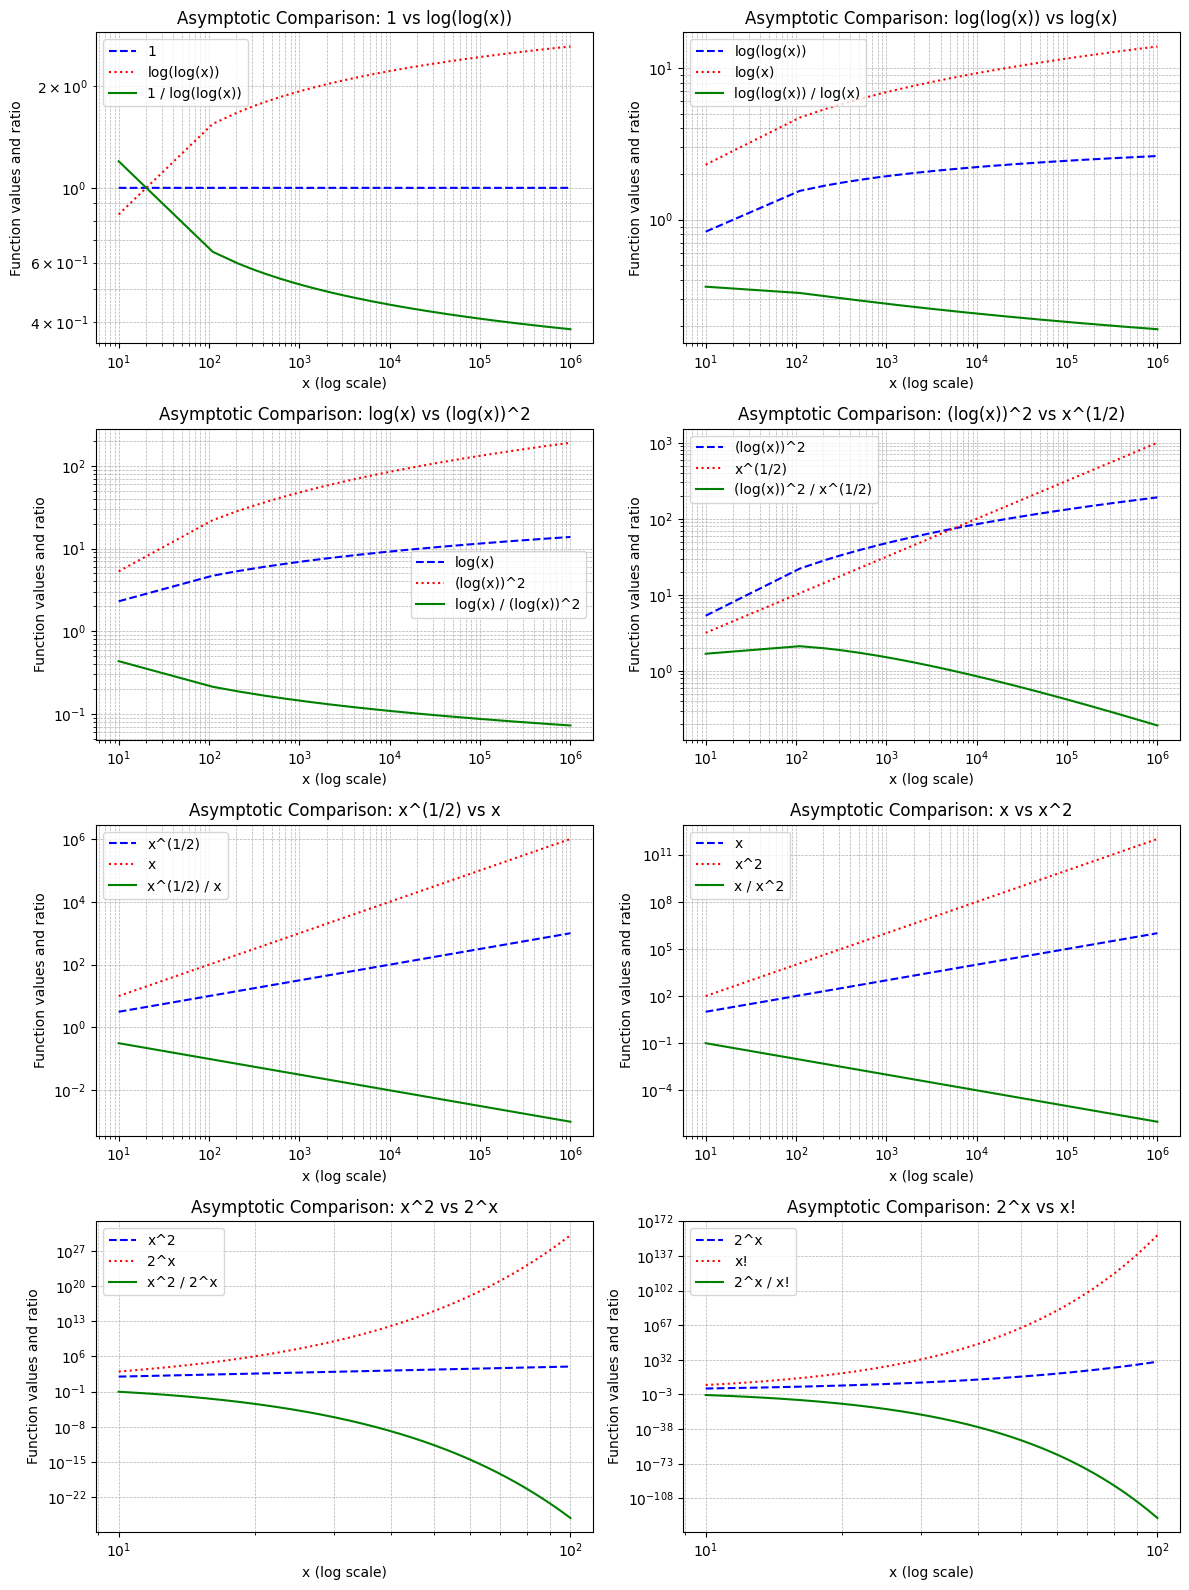

In [2]:
x = np.linspace(10, 10**6, 10000)
x_small = np.linspace(10, 100, 1000)

f1 = lambda x: np.ones_like(x)
f2 = lambda x: np.log(np.log(x))
f3 = lambda x: np.log(x)
f4 = lambda x: np.log(x)**2
f5 = lambda x: np.sqrt(x)
f6 = lambda x: x
f7 = lambda x: x**2
f8 = lambda x: 2**x
f9 = lambda x: gamma(x + 1).astype(float)

functions = [(f1, f2, "1", "log(log(x))"),
             (f2, f3, "log(log(x))", "log(x)"),
             (f3, f4, "log(x)", "(log(x))^2"),
             (f4, f5, "(log(x))^2", "x^(1/2)"),
             (f5, f6, "x^(1/2)", "x"),
             (f6, f7, "x", "x^2"),
             (f7, f8, "x^2", "2^x"),
             (f8, f9, "2^x", "x!")]


plt.figure(figsize=(12, 16))
for i, (f, g, label_f, label_g) in enumerate(functions, 1):
    x_range = x if i < 7 else x_small
    plt.subplot(4, 2, i)
    plt.plot(x_range, f(x_range), label=f"{label_f}", linestyle="dashed", color="blue")
    plt.plot(x_range, g(x_range), label=f"{label_g}", linestyle="dotted", color="red")
    ratio = np.where(g(x_range) != 0, f(x_range) / g(x_range), np.nan)
    plt.plot(x_range, ratio, label=f"{label_f} / {label_g}", linestyle="solid", color="green")
    plt.xscale("log")
    plt.yscale("log")
    plt.xlabel("x (log scale)")
    plt.ylabel("Function values and ratio")
    plt.title(f"Asymptotic Comparison: {label_f} vs {label_g}")
    plt.legend()
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)

plt.tight_layout()
plt.show()